In [1]:
import laspy
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go # visualize point clouds
import cv2

 
Dist = []            # Array for distance
BB = []            # Array for number of pointblickfeld points inside BB=bounding box.
Velo = []            # Array for number of velodyne points inside BB.

del Dist [:]
del BB [:]           
del Velo [:]




In [5]:
record_number = 1 # Either record 1 or record 2

root = f"/Users/akshay/Documents/Mechatronics/Lidar and Radar Systems/Lidar Task/Dataset2022/record1"
path_blickfeld = f"{root}/blickfeld"
path_groundtruth = f"{root}/groundtruth"
path_velodyne = f"{root}/velodyne"

In [6]:
def readPC(path):
    """
       Will return a numpy array of
       shape:
       Nx4 for LiDAR Data (x,y,z,itensity)
       Nx5 for RADAR Data (x,y,z,velocity,itensity)
       
    """
    return np.loadtxt(path)

def readImage(path):
    """
       Will return an numpy array of
       shape height x width x 3.
    """
    return cv2.imread(path)#[:,:,[2,1,0]]

def readLabels(path):
    """
       Reads the ground truth labels.
       In the labels are the following
       information stored:
       0. width in m
       1. length in m
       2. height in m
       3-5. Coordinates of the center in m
       6. yaw rotation in degree
    """
    return np.loadtxt(path)

In [7]:
frame_id:0
for frame_id in range(240):

 assert (record_number == 1 and frame_id < 240) 
 pc_blick = readPC(f"{path_blickfeld}/{frame_id:06d}.csv")
 pc_velo = readPC(f"{path_velodyne}/{frame_id:06d}.csv")
 label = readLabels(f"{path_groundtruth}/{frame_id:06d}.csv")

 pc_blick
 blick_TNP=len(pc_blick)                 # blick_TNP = Total number of blickfeld points in frame
 #print(blick_TNP)

 pc_velo
 velo_TNP=len(pc_velo)                   # velo_TNP = Total number of blickfeld points in frame
 #print(velo_TNP)
  
 label                                # data of BB = [w,l,h,xc,yc,zc,yaw in degree]
 w = label[0]                            # (w= width, l= lenth, h= height) of the BB= Bounding Box
 l = label[1]
 h = label[2]  

 xc= label[3]                            # xc= X-coordinante of the BB center.
 yc= label[4]                            # yc= Y-coordinante of the BB center.
 zc= label[5]                            # zc= Z-coordinante of the BB center.


 """For distance from the origin"""


 center=(xc,yc,zc)                                                            
 origin=(0,0,0)
 distance= math.sqrt( ((xc-0)**2)+((yc-0)**2)+((zc-0)**2) )
 #print('Distance from the origin:', distance,'m','\n')
 Dist.append(distance)                                             # Update distance array by adding value of 'distance' of object.
 
 #del Darr[:]
 #print(Darr)                                     




 """For bounding box corners"""
 
 x1= xc - w/2                            # x1,y1 and z1 are the coordinate of bc1= 1st corner of BB.
 y1= yc - l/2
 z1= zc + h/2

 x8= xc + w/2                            # x8,y8 and z8 are the coordinate of bc8= 8th corner of BB.
 y8= yc + l/2
 z8= zc - h/2

 bc1=(x1,y1,z1)                          #bc1= 1st corner of BB.
 bc2=(x8,y1,z1)                          #bc2= 2nd corner of BB.
 bc3=(x1,y1,z8)                          #bc3= 3rd corner of BB.
 bc4=(x8,y1,z8)                          #bc4= 4th corner of BB.
 bc5=(x1,y8,z1)                          #bc5= 5th corner of BB.
 bc6=(x8,y8,z1)                          #bc6= 6th corner of BB.
 bc7=(x1,y8,z8)                          #bc7= 7th corner of BB.
 bc8=(x8,y8,z8)                          #bc8= 8th corner of BB.

 """print('Eight numbers of corners of the Bounding Box are:')
 print('bc1:',bc1)
 print('bc2:',bc2)
 print('bc3:',bc3)
 print('bc4:',bc4)
 print('bc5:',bc5)
 print('bc6:',bc6)
 print('bc7:',bc7)
 print('bc8:',bc8)
"""
 """For minimal and Maximum value of corner in every direction"""

 Xmin= x1   #minimal value of corner in X direction
 Xmax= x8   #maximum value of corner in X direction

 Ymin= y1   #minimal value of corner in Y direction
 Ymax= y8   #maximum value of corner in Y direction

 Zmin= z8   #minimal value of corner in Z direction
 Zmax= z1   #maximum value of corner in Z direction


 """For counting number of BLICKFELD points/data inside BB"""

 blick_TNP_I_BB = 0

 i = 0

 for i in range(blick_TNP):
    xb=pc_blick[i,0]
    yb=pc_blick[i,1]
    zb=pc_blick[i,2]
    
    if x8 >= xb >= x1 and y8 >= yb >= y1 and z1 >= zb >= z8:
       blick_TNP_I_BB += 1
      
    i+=1
 BB.append(blick_TNP_I_BB)                          # Update blickfeld array by adding value of 'blick_TNP_I_BB' of frame.


 #print(blick_TNP_I_BB) 

 #del Barr[:]
 #print(Barr)                 
 
 """For counting number of VELODYNE points/data inside BB"""

 velo_TNP_I_BB = 0
 i = 0

 for i in range(velo_TNP):
    xv=pc_velo[i,0]
    yv=pc_velo[i,1]
    zv=pc_velo[i,2]
    if x8 >= xv >= x1 and y8 >= yv >= y1 and z1 >= zv >= z8:
       velo_TNP_I_BB += 1
      
    i+=1
 Velo.append(velo_TNP_I_BB)                            # Update velodyne array by adding value of 'velo_TNP_I_BB' of frame.

 #print(velo_TNP_I_BB) 

 #del Varr[:]                                    
 #print(Varr)  

 frame_id+=1


In [8]:
print('Distance of the object=',Dist)
print('Blickfeld points inside BB=',BB)
print('Velodyne points indside BB=',Velo)

Distance of the object= [26.879358357225158, 26.604048353403517, 26.601511191407244, 26.54399690126665, 26.264687693088877, 25.92993298544986, 25.88627403353013, 25.536961016588673, 25.27049276222528, 25.18867366092738, 25.007326099433293, 24.90641824928624, 24.62858822525205, 24.39068644627828, 24.312549329642145, 23.909471512374257, 23.876150531216286, 24.22594472628088, 23.414195955776727, 22.986432655745872, 23.01729956184002, 22.758325920632977, 22.578202620377745, 22.616563374405473, 22.19694926210744, 21.97886106882897, 21.69070636847001, 21.69723415908071, 21.328623883145752, 21.22071024998276, 20.978268313169917, 20.820830219743716, 20.337446358932368, 20.401517977795233, 20.255189557579712, 19.983800090297017, 20.136688653791662, 19.82255898546442, 19.512629597665214, 19.66657173322347, 19.625096737498417, 19.301897590864602, 19.196798651143766, 18.730448211031142, 18.371049674497662, 18.139298641197485, 18.29094176772188, 17.764573230730058, 17.76282791293993, 17.75110971617

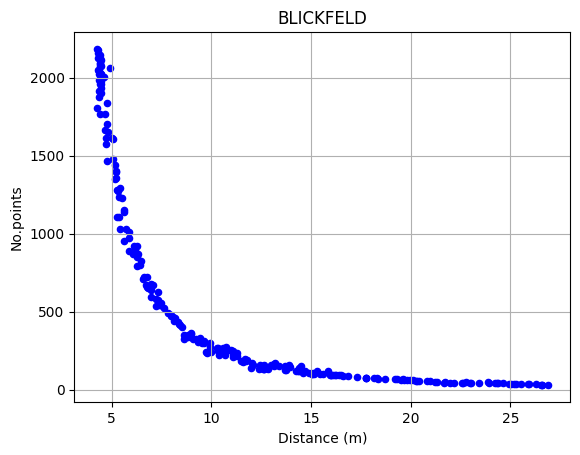

In [9]:
import matplotlib.pyplot as plt

Dist [:]                                  
BB [:]                                  
Velo [:]
plt.scatter(Dist,BB,color='blue',s=20,marker="o")
plt.ylabel('No.points')
plt.xlabel('Distance (m)')
plt.title('BLICKFELD')
plt.grid()

## Visualization
To understand the data easier, we visualize them. We can use the package matplotlib.pyplot and/or plotly.

For 3D we can use plotly.graph_objects:

If we want to visualize the groundtruth properly, we have to transform the label such that we have the 8 corners of the bounding box.
The steps are the following:
1. Generate a box of the right dimension
2. Rotate the corners according to the yaw rotation
3. Translate the corners according to the center coordinates

In [11]:
def rt_matrix(roll=0, pitch=0, yaw=0):
    """
        Returns a 3x3 Rotation Matrix. Angels in degree!
    """
    yaw = yaw * np.pi / 180
    roll = roll * np.pi / 180
    pitch = pitch * np.pi / 180
    c_y = np.cos(yaw)
    s_y = np.sin(yaw)
    c_r = np.cos(roll)
    s_r = np.sin(roll)
    c_p = np.cos(pitch)
    s_p = np.sin(pitch)
    
    # Rotationmatrix
    rot = np.dot(np.dot(np.array([[c_y, - s_y,   0],
                                  [s_y,   c_y,   0],
                                  [0,      0,    1]]),
                        np.array([[c_p,    0,    s_p],
                                  [0,      1,    0],
                                  [-s_p,   0,    c_p]])),
                        np.array([[1,      0,    0],
                                  [0,     c_r, - s_r],
                                  [0,     s_r,   c_r]]))
    return rot

def rotate_points(points, rot_t):
    """
        Input must be of shape N x 3
        Returns the rotated point cloud for a given roation matrix 
        and point cloud.
    """
    points[0:3,:] = np.dot(rot_t, points[0:3,:])
    return points

def make_boundingbox(label):
    """
        Returns the corners of a bounding box from a label.
    """
    corner = np.array([
        [+ label[0]/2, + label[1]/2, + label[2]/2],
        [+ label[0]/2, + label[1]/2, - label[2]/2],
        [+ label[0]/2, - label[1]/2, + label[2]/2],
        [+ label[0]/2, - label[1]/2, - label[2]/2],
        [- label[0]/2, + label[1]/2, + label[2]/2],
        [- label[0]/2, - label[1]/2, + label[2]/2],
        [- label[0]/2, + label[1]/2, - label[2]/2],
        [- label[0]/2, - label[1]/2, - label[2]/2],
    ])
    corner = rotate_points(corner, rt_matrix(yaw = label[6]))
    corner = corner + label[3:6]
    return corner

In [14]:
bb = make_boundingbox(label)

# New bounding box for the visualization
bb = np.array([bb[0],bb[1],bb[3],bb[2],bb[0],bb[4],bb[5],
               bb[2],bb[3],bb[7],bb[5],bb[4],bb[6],bb[7],bb[6],bb[1]])

In [15]:
data = [        
                go.Scatter3d(x = pc_blick[:,0],                     # bickfeld
                     y = pc_blick[:,1],
                     z = pc_blick[:,2],
                    mode='markers', type='scatter3d',
                    text=np.arange(pc_blick.shape[0]),
                    marker={
                        'size': 2,
                        'color': "green",
                        'colorscale':'rainbow',
}),
                
                
                go.Scatter3d(x = pc_velo[:,0],                      # velodyne
                    y = pc_velo[:,1],
                    z = pc_velo[:,2],
                    mode='markers', type='scatter3d',
                    text=np.arange(pc_velo.shape[0]),
                    marker={
                        'size': 2,
                        'color': "yellow",
                        'colorscale':'rainbow',
}),    

                       
                go.Scatter3d(x = bb[:,0],                           # bounding box = BB.
                    y = bb[:,1],
                    z = bb[:,2],
                    mode='lines', type='scatter3d',
                    line={
                        'width': 10,
                        'color': "red",
                        'colorscale':'rainbow'
}),             

                go.Scatter3d(x = [label[3]],                         # center of BB.
                     y = [label[4]],
                     z = [label[5]],
                    mode='markers', type='scatter3d',
                    marker={
                        'size': 5,
                        'color': "black",
                        'colorscale':'rainbow',

}),                       
]

layout = go.Layout(
    scene={
        'xaxis': {'range': [-20, 20], 'rangemode': 'tozero', 'tick0': -5},
        'yaxis': {'range': [0, 40], 'rangemode': 'tozero', 'tick0': -5},
        'zaxis': {'range': [-20., 20.], 'rangemode': 'tozero'}
    }
)
go.Figure(data=data, layout = layout)